In [40]:
# Imports 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data
data_url = ("https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv")

df = pd.read_csv(data_url)

df.head()

,date,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
1,2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2,2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
3,2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
4,2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [4]:
# Examine data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1793 non-null   object 
 1   00:00   1793 non-null   float64
 2   01:00   1793 non-null   float64
 3   02:00   1793 non-null   float64
 4   03:00   1793 non-null   float64
 5   04:00   1793 non-null   float64
 6   05:00   1793 non-null   float64
 7   06:00   1793 non-null   float64
 8   07:00   1793 non-null   float64
 9   08:00   1793 non-null   float64
 10  09:00   1793 non-null   float64
 11  10:00   1793 non-null   float64
 12  11:00   1793 non-null   float64
 13  12:00   1793 non-null   float64
 14  13:00   1793 non-null   float64
 15  14:00   1793 non-null   float64
 16  15:00   1793 non-null   float64
 17  16:00   1793 non-null   float64
 18  17:00   1793 non-null   float64
 19  18:00   1793 non-null   float64
 20  19:00   1793 non-null   float64
 21  20:00   1793 non-null   float64
 22  

In [20]:
# Combine date and hour columns into a single column
combined_df = pd.melt(df, id_vars=['date'], var_name='Hour', value_name='Energy_Consumption')
combined_df['time'] = combined_df['date'] + ' ' + combined_df['Hour']
combined_df['time'] = pd.to_datetime(combined_df['time'])
combined_df.drop(['date', 'Hour'], axis=1, inplace=True)
combined_df.sort_values('time', inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df = combined_df[['time', 'Energy_Consumption']]

combined_df.head()

,time,Energy_Consumption
0,2017-01-01 00:00:00,8791.8
1,2017-01-01 01:00:00,8569.7
2,2017-01-01 02:00:00,8326.4
3,2017-01-01 03:00:00,8137.5
4,2017-01-01 04:00:00,8011.9


In [23]:
combined_df.index

RangeIndex(start=0, stop=43032, step=1)

In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43032 entries, 0 to 43031
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                43032 non-null  datetime64[ns]
 1   Energy_Consumption  43032 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.5 KB


In [26]:
# statistics of the data set. Here T is to transpose the matrix.
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
time,43032,2019-06-16 17:14:32.392637952,2017-01-01 00:00:00,2018-03-25 05:45:00,2019-06-16 11:30:00,2020-09-06 17:15:00,2021-11-30 23:00:00,NaN
Energy_Consumption,43032.0,12288.986159,6844.0,10351.575,11620.9,13784.05,21256.1,2699.001514


In [27]:
df_filled=combined_df.bfill().ffill()

In [28]:
df_filled.info()
df_filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43032 entries, 0 to 43031
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                43032 non-null  datetime64[ns]
 1   Energy_Consumption  43032 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.5 KB


,time,Energy_Consumption
0,2017-01-01 00:00:00,8791.8
1,2017-01-01 01:00:00,8569.7
2,2017-01-01 02:00:00,8326.4
3,2017-01-01 03:00:00,8137.5
4,2017-01-01 04:00:00,8011.9
...,...,...
43027,2021-11-30 19:00:00,11935.8
43028,2021-11-30 20:00:00,11713.2
43029,2021-11-30 21:00:00,11335.0
43030,2021-11-30 22:00:00,10795.9


In [36]:
# Convert time column to datetime
df_filled['time'] = pd.to_datetime(df_filled['time'])  

# Set 'time' column as index
df_filled.set_index('time', inplace=True)

# Resample and calculate the difference
X = df_filled["Energy_Consumption"].resample("h").mean().diff(periods=1).values[2:]

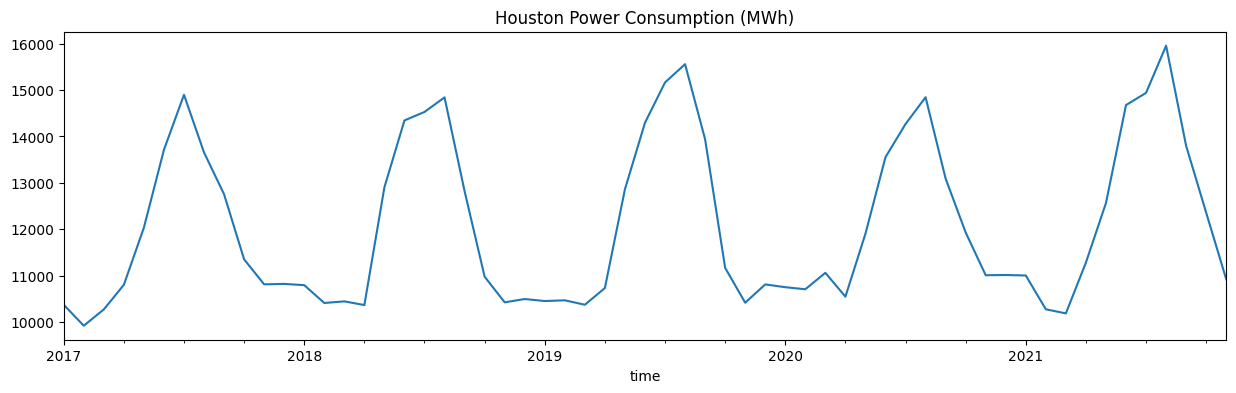

In [46]:
df_monthly_median = df_filled[["Energy_Consumption"]].resample("m").median(); df_monthly_median
df_monthly_median["Energy_Consumption"].plot(title="Houston Power Consumption (MWh)", figsize=(15,4)).figure.savefig("energy.png");

In [47]:
# Imports for ARIMA model
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

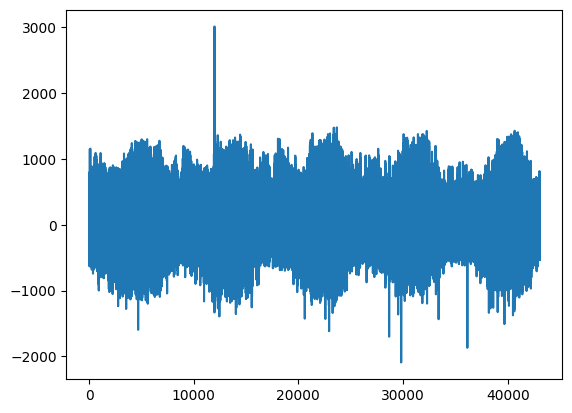

In [55]:
# Detrend the data
X = df_filled["Energy_Consumption"].resample("h").mean().diff(periods=1).values[2:]
plt.plot(X)

In [60]:
#X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)
X_train = X[:34462]
X_test = X[34462:]

In [61]:
X.shape

(43078,)

In [62]:
X_train.shape

(34462,)

In [63]:
X_test.shape

(8616,)